# Project: No-show Appointments Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

<p>In this project we will be analysis data associated with medical appointments. In particular we'll be interested in finding the a trends anmony the patients that didn't show up for they appointment.</p>

<p>The dateset we will be using in this project is called No-show appointment and is provide by Kaggle. The dateset is a collection of information from 100k medical appointments in Brazil with the focus on whether the patients show up for their appointment or not.</p>

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [36]:
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<ul>
    <li>PatientId: self explanatory</li>
    <li>AppointmentID: self explanatory</li>
    <li>Gender: self explanatory</li>
    <li>ScheduledDay: the day the patient scheduled for the appointment</li>
    <li>AppointmentDay:the day of the appointment it self</li>
    <li>Age: self explanatory</li>
    <li>Neighbourhood: what neighbourhood was patient living in?</li>
    <li>Scholarship: did the patient have a scholarship? 1 if he/she did otherwise 0</li>
    <li>Hipertension: did the patient have a high blood pressure? 1 if he/she did otherwise 0</li>
    <li>Diabetes: was the patient diabetic? 1 if he/she did otherwise 0</li>
    <li>Alcoholism: was the patient alcoholic? 1 if he/she did otherwise 0</li>
    <li>Handcap: was the patient handcap? 1 if he/she did otherwise 0</li>
    <li>SMS_received: did the patient receive a SMS for hes/shes appointment? 1 if he/she did otherwise 0</li>
    <li>No-show: did the NOT show up for the Appointment? Yes if he/she did otherwise No </li>
</ul>

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


<ul>
    <li>PatientId type must change into type np.int64</li>
    <li>AppointmentID,ScheduledDay types must change into type datetime64</li>
    <li>Scholarship, Hipertension, Diabetes, Alcoholism, Handcap SMS_received and No_show types must change into type boolean</li>
    <li>the No-show into No_show becauses it's easier to deal with in .query()</li>
</ul>

In [38]:
df.shape

(110527, 14)

In [39]:
sum(df.duplicated())

0

In [40]:
df.isnull().sum().any()

False

In [41]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.920000e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172615e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173180e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439170e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999820e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


age has a min of -1?

In [42]:
df.query("Age < 0").head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659430e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


invalid age, replace with the mean of df["AGE"]

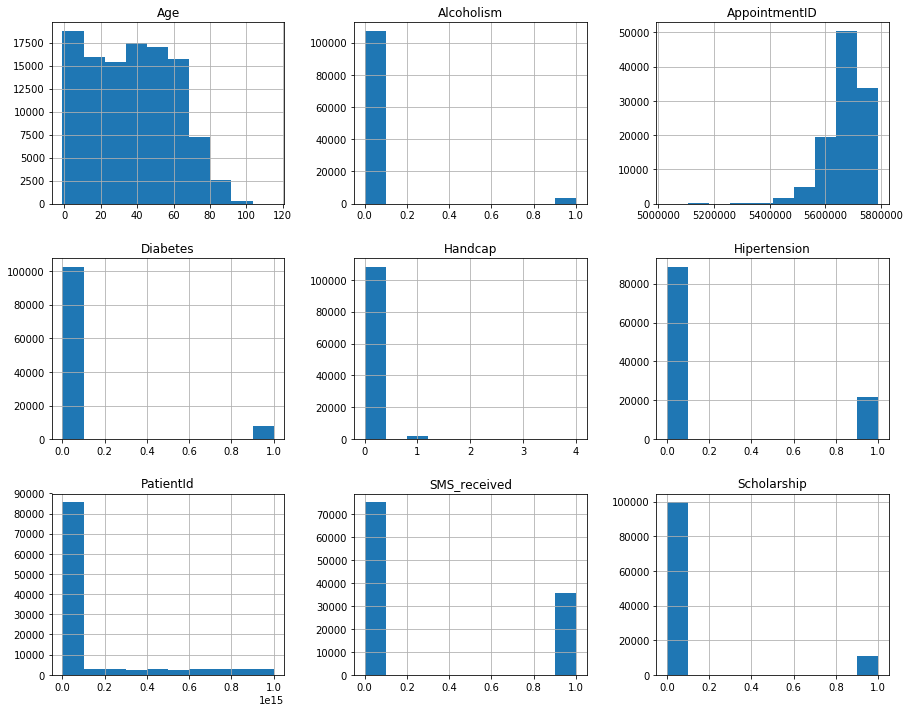

In [45]:
df.hist(figsize=(15,12));


### Data Cleaning (Replace this with more specific notes!)

In [46]:
def remove_nulls_and_duplicates(d):
    '''removes any nulls and duplicates it finds when given a dataframe'''
    if sum(d.duplicated()) > 0:
        d = d.drop_duplicates(inplace=True)
    if d.isnull().sum().any():
        d = d.dropna(inplace=True)
    # this part had to be hard coded becauses .isnull() does not detect negative numbers
    d.loc[(d.Age < 0), 'Age'] = round(df["Age"].mean())
    return d


def change_to_int64(d, fields):
    '''takes a dataframe and a list of fields and changes the type of those fields into np.int64'''
    for field in fields:
        d[field] = d[field].astype(np.int64)
    return d


def change_to_datetime64(d, fields):
    '''takes a dataframe and a list of fields and changes the type of those fields into datetime64[ns]'''
    for field in fields:
        d[field] = d[field].astype('datetime64[ns]')
    return d


def change_to_bool(d, fields):
    '''takes a dataframe and a list of fields and changes the type of those fields into 'bool'''
    for field in fields:
        d[field] = d[field].astype('bool')
    return d


In [47]:
# step 2 Data wrangling

# step 2.1 Remove nulls & duplicates
df = remove_nulls_and_duplicates(df)

# step 2.2 Fix types
df = change_to_int64(df, ['PatientId'])
df = change_to_datetime64(df, ['ScheduledDay', 'AppointmentDay'])
df = change_to_bool(df, ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received'])
# change the name of the No-show field into No_show becauses it's easier to deal with in .query()
df['No_show'] = df['No-show'].replace(dict(Yes=True, No=False))
del df['No-show']

# step 2.3 drop the fields that were aren't using
df.drop(['Neighbourhood','Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap'],axis=1,inplace=True)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1:
#### is there a relationship between (AppointmentDay-ScheduledDay) & No-show

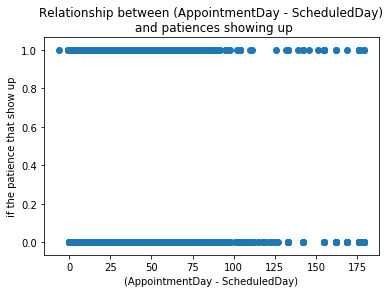

In [48]:
df["Days_Between_Ad_Sd"] = df['AppointmentDay'].dt.date - df['ScheduledDay'].dt.date

# plot 1 - "Relationship between (AppointmentDay - ScheduledDay)\n and patiences showing up" (not useful)
plt.scatter(x=df["Days_Between_Ad_Sd"].astype('timedelta64[D]'), y=df['No_show'])
plt.title("Relationship between (AppointmentDay - ScheduledDay)\n and patiences showing up")
plt.xlabel("(AppointmentDay - ScheduledDay)")
plt.ylabel("if the patience that show up")
plt.show()

relationship not clear, try a other plot

In [49]:
df["Days_Between_Ad_Sd"].describe()

count                     110527
mean     10 days 04:24:31.828602
std      15 days 06:07:11.673762
min            -6 days +00:00:00
25%              0 days 00:00:00
50%              4 days 00:00:00
75%             15 days 00:00:00
max            179 days 00:00:00
Name: Days_Between_Ad_Sd, dtype: object

min of -6? someone must of accidentally scheduled she/he appointmentDay to be last week

In [50]:
df["Days_Between_Ad_Sd"].head()

0   0 days
1   0 days
2   0 days
3   0 days
4   0 days
Name: Days_Between_Ad_Sd, dtype: timedelta64[ns]

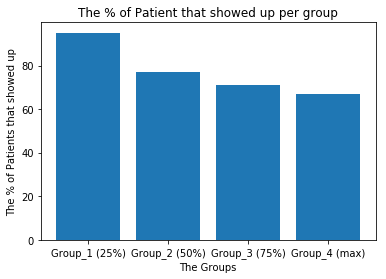

In [51]:
# plot 2 - The % of Patients that showed up per group
cutoffs = ['min', '25%', '50%', '75%', 'max']
bin_names = ['Group_{}'.format(num) for num in range(len(cutoffs))[1:]]
bin_edges = [timedelta(-7), timedelta(0), timedelta(4), timedelta(15), timedelta(179)]
df['Days_Between_Ad_Sd_Age_group'] = pd.cut(df['Days_Between_Ad_Sd'], bin_edges, labels=bin_names)

groupsize = [
        df.query("Days_Between_Ad_Sd_Age_group == '{}'".format(bin_name)).count().AppointmentDay
        for bin_name in bin_names]
groupShow = [
        df.query("Days_Between_Ad_Sd_Age_group == '{}' and No_show == False".format(bin_name)).count().AppointmentDay
        for bin_name in bin_names]
groupShowp = [round((x / y) * 100).astype(int) for x, y in zip(groupShow, groupsize)]

y = groupShowp
xlabels = ["{} ({})".format(name, cutoff) for name, cutoff in zip(bin_names, cutoffs[1:])]
x = range(len(bin_names))
plt.bar(x, y)
plt.xticks(x, xlabels)
plt.xlabel("The Groups")
plt.ylabel("The % of Patients that showed up")
plt.title("The % of Patient that showed up per group")
plt.show()

relationship is clear in this plot

### Research Question 2 
#### there a relationship between SMS_received & No-show

In [52]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

show = df.query('No_show == False').count().AppointmentDay
no_show = df.query('No_show == True').count().AppointmentDay
SMS_received = df.query('SMS_received == True').count().AppointmentDay
SMS_received_show = df.query('SMS_received == True and No_show == False').count().AppointmentDay
SMS_received_noshow = df.query('SMS_received == True and No_show == True').count().AppointmentDay
noSMS_received = df.query('SMS_received == False').count().AppointmentDay
noSMS_received_show = df.query('SMS_received == False and No_show == False').count().AppointmentDay
noSMS_received_noshow = df.query('SMS_received == False and No_show == True').count().AppointmentDay
    

just count every possible outcome calculate the probability of it happening

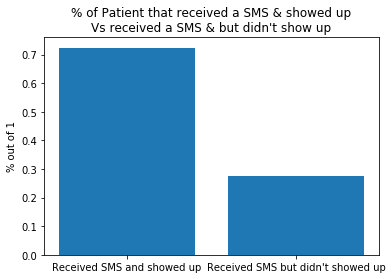

In [53]:
# plot one - % of Patients that received a SMS & showed up Vs received a SMS & didn't show up
y = [SMS_received_show / SMS_received, SMS_received_noshow / SMS_received]
xlabels = ['Received SMS and showed up', "Received SMS but didn't showed up"]
x = [1, 2]
plt.bar(x, y)
plt.xticks(x, xlabels)
plt.title("% of Patient that received a SMS & showed up\nVs received a SMS & but didn't show up")
plt.ylabel("% out of 1")
plt.show()

given a Patient received a SMS & showed up vs give a Patient received a SMS & but didn't show up

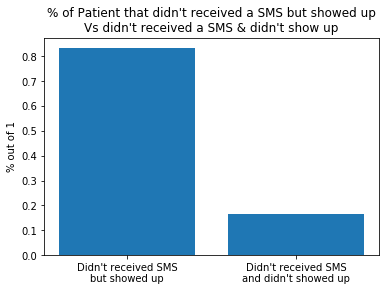

In [54]:
# plot two - % of Patients that didn't received a SMS but showed up Vs didn't received a SMS & didn't show up
y = [noSMS_received_show / noSMS_received, noSMS_received_noshow / noSMS_received]
xlabels = ["Didn't received SMS\nbut showed up", "Didn't received SMS\nand didn't showed up"]
x = [1, 2]
plt.bar(x, y)
plt.xticks(x, xlabels)
plt.title("% of Patient that didn't received a SMS but showed up\nVs didn't received a SMS & didn't show up")
plt.ylabel("% out of 1")
plt.show()

given a Patient didn't received a SMS but showed up vs give a Patient didn't received a SMS & didn't show up

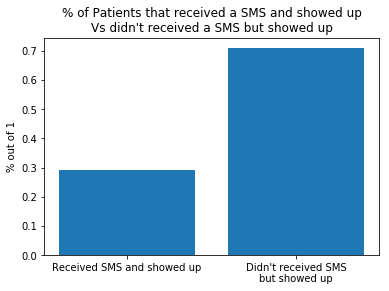

In [55]:
# plot three -  % of Patients that received a SMS and showed up Vs didn't received a SMS but showed up
y = [SMS_received_show / show, noSMS_received_show / show]
xlabels = ['Received SMS and showed up', "Didn't received SMS\nbut showed up"]
x = [1, 2]
plt.bar(x, y)
plt.xticks(x, xlabels)
plt.title("% of Patients that received a SMS and showed up\nVs didn't received a SMS but showed up")
plt.ylabel("% out of 1")
plt.show()

from the total amount of Patients that show up,what % of them did got sms and what % of them didn't 

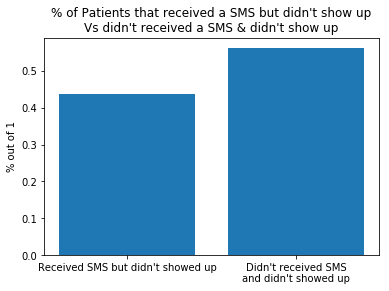

In [56]:
y = [SMS_received_noshow / no_show, noSMS_received_noshow / no_show]
xlabels = ["Received SMS but didn't showed up", "Didn't received SMS\nand didn't showed up"]
x = [1, 2]
plt.bar(x, y)
plt.xticks(x, xlabels)
plt.title("% of Patients that received a SMS but didn't show up\nVs didn't received a SMS & didn't show up")
plt.ylabel("% out of 1")
plt.show()


from the total amount of Patients that didn't show up,what % of them did got sms and what % of them didn't 

### Research Question 3
#### there relationship between age & no-show

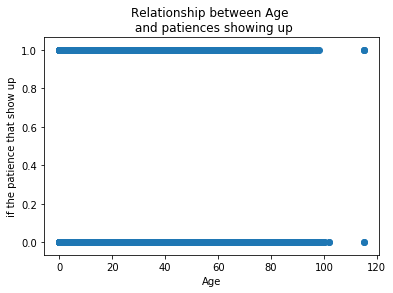

In [57]:
plt.scatter(x=df["Age"], y=df['No_show'])
plt.title("Relationship between Age \n and patiences showing up")
plt.xlabel("Age")
plt.ylabel("if the patience that show up")
plt.show()

again scatter plot doesn't show relationship clearly, try a other plot

In [58]:
df["Age"].describe()

count    110527.000000
mean         37.089218
std          23.109921
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

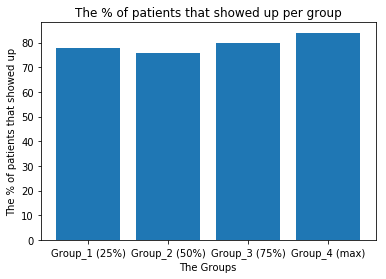

In [59]:
cutoffs = ['min', '25%', '50%', '75%', 'max']
bin_names = ['Group_{}'.format(num) for num in range(len(cutoffs))[1:]]
bin_edges = [np.NINF, 18, 37, 55, 115]
df['Age_group'] = pd.cut(df['Age'], bin_edges, labels=bin_names)

groupsize = [df.query("Age_group == '{}'".format(bin_name)).count().AppointmentDay for bin_name in bin_names]
groupShow = [df.query("Age_group == '{}' and No_show == False".format(bin_name)).count().AppointmentDay for
                 bin_name in bin_names]
groupShowp = [round((x / y) * 100).astype(int) for x, y in zip(groupShow, groupsize)]

y = groupShowp
xlabels = ["{} ({})".format(name, cutoff) for name, cutoff in zip(bin_names, cutoffs[1:])]
x = range(len(bin_names))
plt.bar(x, y)
plt.xticks(x, xlabels)
plt.title("Age group show %")
plt.xlabel("The Groups")
plt.ylabel("The % of patients that showed up")
plt.title("The % of patients that showed up per group")
plt.show()

better

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

### Q1)

our 2nd plot show that longer that gap between appointment day and the scheduled day the more likely the patient won’t show up for the appointment.


<ul>
Note:
    <li>Group_1 = [-6,0]</li>
    <li>Group_2 = (0,4]</li>
    <li>Group_3 = (4,15]</li>
    <li>Group_4 = (15,179]</li>
</ul>


### Q2)

#### Plot 1)

No surprise here, given that a patient receives an SMS they are likely to show up to their appointment about 70% of the time.

#### Plot 2)

From this plot, we can theorize that most people either didn’t know that they can receive an SMS for their appointment or didn’t bother asking for the service because given that a patient doesn’t receive an SMS more than 80% of patients will show up for their appointment.

#### Plot 3)

This plot reinforces the theory stated above, form all the people who showed up for an appointment about %70 did receive an SMS.

#### Plot 4)

This plot is interesting, form all who didn't show up for their appointment about 45% of them were form patient that receive a SMS and as we theorize before the number of people who don't receive an SMS are the biggest group in this dataset which means that if you did receive an SMS you are more likely to not show up.

#### Conclusion

While there is a relationship between receiving an SMS and showing up for an appointment it is a weak one and I think this dataset just shows that most patients don’t ask for an SMS message than showing the relationship between SMS and showing up. 

### Q3)

our 2nd shows there is no relationship between age and showing up for an appointment.


<ul>
Note:
    <li>Group_1 = [0,18]</li>
    <li>Group_2 = (18,37]</li>
    <li>Group_3 = (37,55]</li>
    <li>Group_4 = (55,115]</li>
</ul>


### Limitations)

<ul>
    <li>we a negative value in the age field which i replace it with value of mean of the whole field which might the best why to handly it and it might of affected my conclusion</li>
    <li>the negative value also questions the integrity of the age</li>
    <li>there is a huge a gap bewteen the amount that patients that receive a SMS and the amount that patients that didn't which might stem from the hospitals is not making such a service known to the patients</li>
    <li>the way i explode the data is mostly correlational, and just because two variables correlate doesn't mean a the change in variable 1 changes something in variable 2</li> 
</ul>


